In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#importing dataset
data = pd.read_csv('credit_risk_dataset_training.csv')

In [5]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [6]:
data.shape

(22850, 12)

In [7]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Types of Data

If each observation belongs to one of a set of categories, that variable is called categorical variable. If observations take numerical values that represent different magnitudes of the variable, that variable called quantitive variable.

In [8]:
#creating seperate lists for categorical and numerical variables
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical = ['person_home_ownership', 'loan_intent','loan_grade','loan_status','cb_person_default_on_file']

### Descriptive Summaries of Quantitive Variables

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

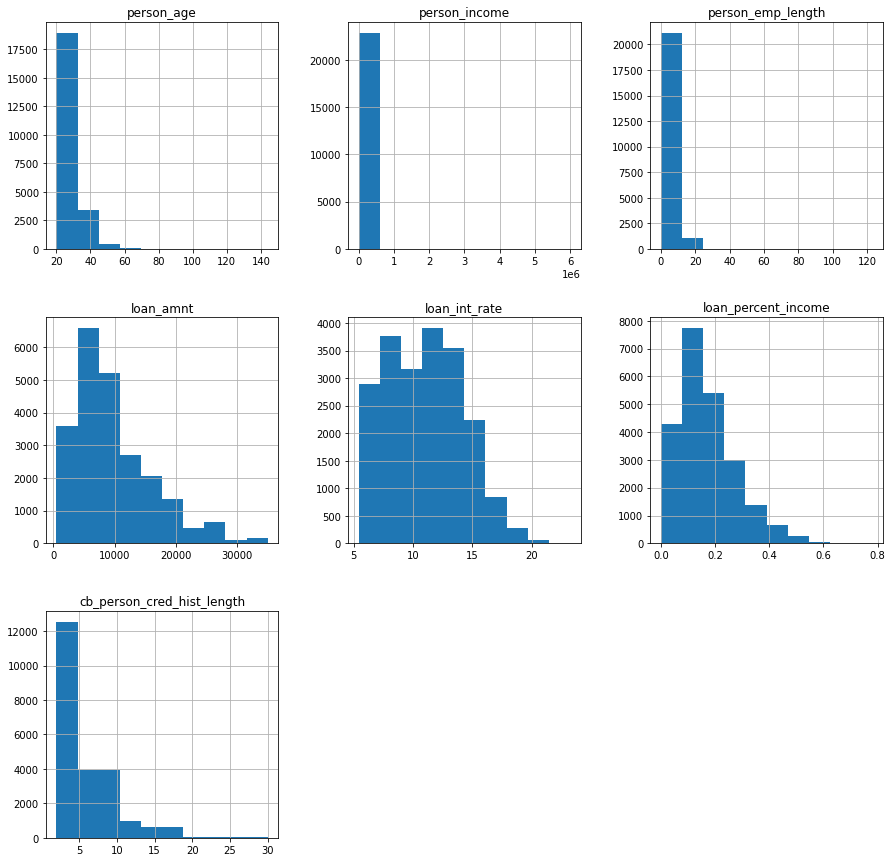

In [9]:
#summarizing quantitative variables graphically
data[numerical].hist(figsize=(15,15))

The Shape of a Distribution: A histogram for a data set describes the distribution of the data, that is, the values the variable takes and the frequency of occurrence of each value. The distributions may have one or more than one mounds. If the distribution has more than one mound, it is not unimodel distribution. For example, some of our distribution has two mounds, this is called bimodal distribution. The shape of the distribution can be symmetric or skewed.

**Examining each variable**

In [10]:
def descriptive_summary_n(column):
    fig, axs = plt.subplots(1,2, figsize=(19,6))
    axs[0].hist(data[column]) #creating histogram plot
    axs[0].axvline(data[column].mean(), color='red', label=f"Mean: {round(data[column].mean(),2)}") #vertical line for mean of the distribution
    axs[0].axvline(data[column].median(), color='green', label=f"Median: {round(data[column].median(),2)}") #vertical line for median of the distribution
    axs[0].axvline(x=data[column].describe()[4],color='r', linestyle='--', label=f"25th percentile: {data[column].describe()[4]}") #vertical line for 25th percentile of the distribution
    axs[0].axvline(x=data[column].describe()[6],color='r', linestyle='--', label=f"75th percentile: {data[column].describe()[6]}") #vertical line for 75th percentile of the distribution
    axs[0].legend()
    sns.boxplot(data=data, x=column, ax=axs[1]) #creating boxplot
    axs[1].axvline(data[column].mean(), color='red') #vertical line for the mean of the distribution
    fig.suptitle(f"Histogram and Boxplot of {column}")
    plt.show()
    print(f"{data[column].describe().round(3)}\n")
    print(f"Range: {data[column].max() - data[column].min()}")
    print(f"Interquartile Range: {data[column].describe()[6] - data[column].describe()[4]}\n")
    print(f"Skewness: {skew(data[data[column].isna()==False][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[data[column].isna()==False][column], bias=True)}")

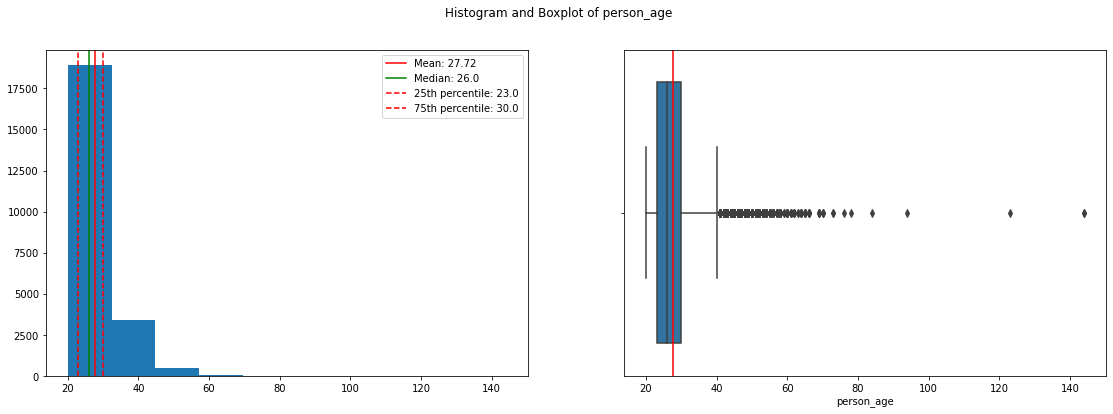

count    22850.000
mean        27.718
std          6.328
min         20.000
25%         23.000
50%         26.000
75%         30.000
max        144.000
Name: person_age, dtype: float64

Range: 124
Interquartile Range: 7.0

Skewness: 2.5323348902395564
Kurtosis: 17.520074196854306


In [11]:
descriptive_summary_n(numerical[0])

Range compared to Interquartile Range is very large. Data is mostly distributed between 23 and 30, and it is right skewed. Skewness is used to measure how much the data is skewed. If skew is zero it means there is no skew. However, if it is positive it means it right skewed. In the case of person_age variable, it is 2.58. Kurtosis is used to measure how data is tailed compared to normal distribution. If it equals to 3 it means it is very close to normal distribution. If it is greater than 3, it means that it is very long tailed and has lots of outliers. Kurtosis of "person_income" variable is 18.56, greater than 3. The data is long tailed and potentially has outliers.

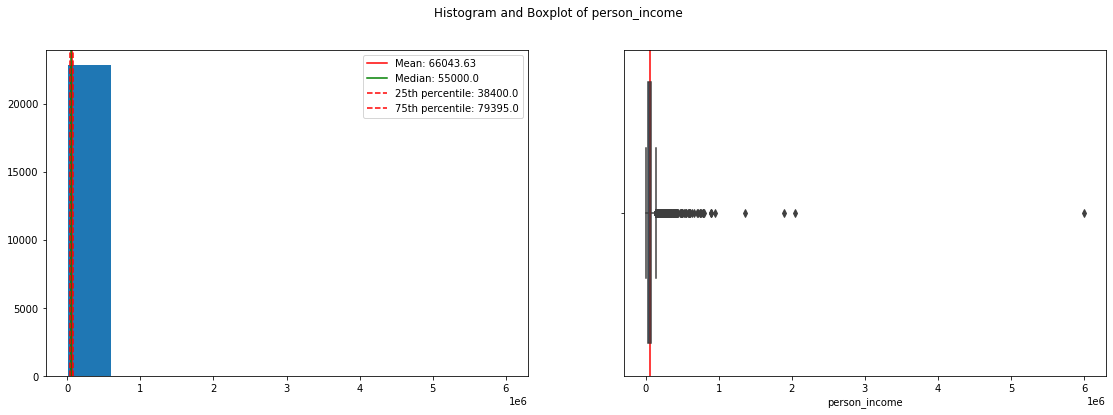

count      22850.000
mean       66043.634
std        64233.700
min         4000.000
25%        38400.000
50%        55000.000
75%        79395.000
max      6000000.000
Name: person_income, dtype: float64

Range: 5996000
Interquartile Range: 40995.0

Skewness: 39.11774068384042
Kurtosis: 3276.776492172028


In [12]:
descriptive_summary_n(numerical[1])

"person_income" variable is heavily right skewd, is very long tailed and has lots of outliers. Standard deviation of the data is 61983.12 which means that there is big variation in the data. But data mostly distributed between 38500 and 79200.

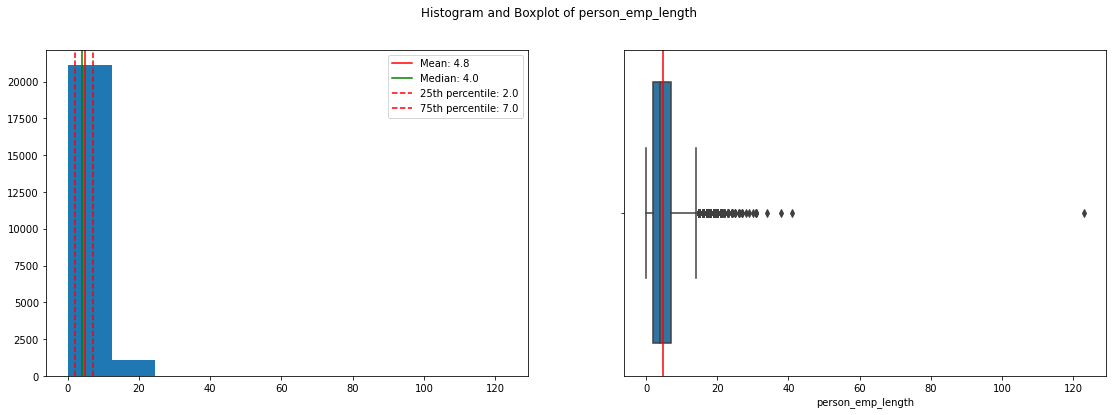

count    22237.000
mean         4.800
std          4.112
min          0.000
25%          2.000
50%          4.000
75%          7.000
max        123.000
Name: person_emp_length, dtype: float64

Range: 123.0
Interquartile Range: 5.0

Skewness: 2.2663868604042303
Kurtosis: 32.91099251671335


In [13]:
descriptive_summary_n(numerical[2])

"person_emp_length" is right skewed and long tailed with potential outliers. It is mostly distributed between 2 and 7. Max number is 123, 123 years of employment length seems very strange, this observation is potentially an error.

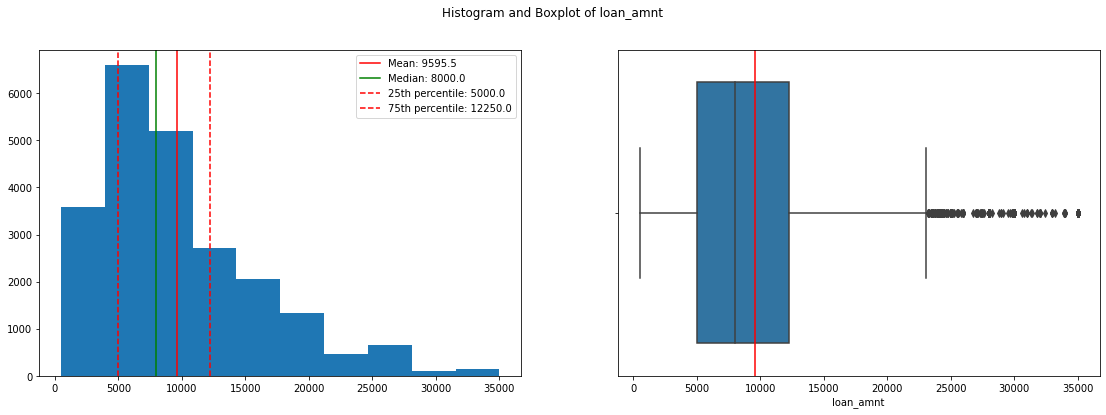

count    22850.000
mean      9595.500
std       6327.604
min        500.000
25%       5000.000
50%       8000.000
75%      12250.000
max      35000.000
Name: loan_amnt, dtype: float64

Range: 34500
Interquartile Range: 7250.0

Skewness: 1.1914356406885303
Kurtosis: 1.4171494556283504


In [14]:
descriptive_summary_n(numerical[3])

"loan_amnt" variable is slightly right skewed. Kurtosis equals to 1.42, which means it is lighter tailed than normal distribution. 

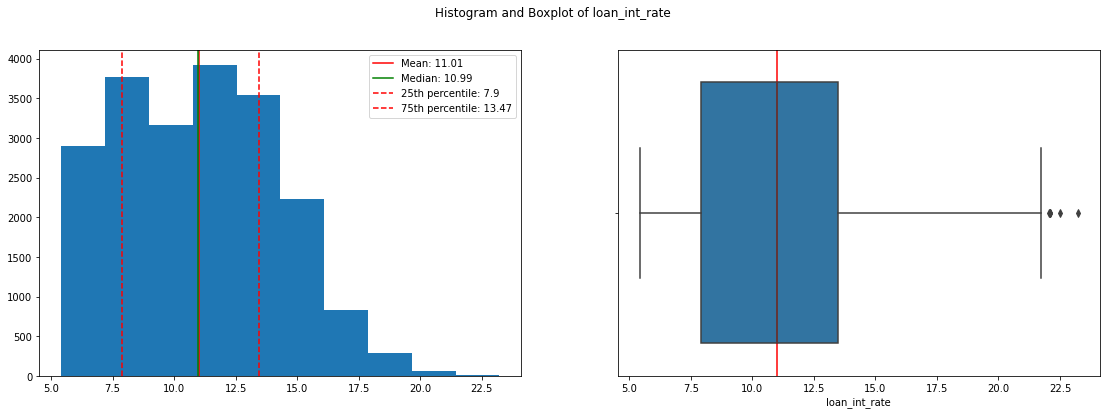

count    20703.000
mean        11.014
std          3.244
min          5.420
25%          7.900
50%         10.990
75%         13.470
max         23.220
Name: loan_int_rate, dtype: float64

Range: 17.799999999999997
Interquartile Range: 5.57

Skewness: 0.2030226031933632
Kurtosis: -0.6730339395962499


In [15]:
descriptive_summary_n(numerical[4])

"loan_int_rate" variable's skewness is 0.20, very close to normal distribution. Data is lighter tailed than normal distribution. Mean and Median very close to each other. 

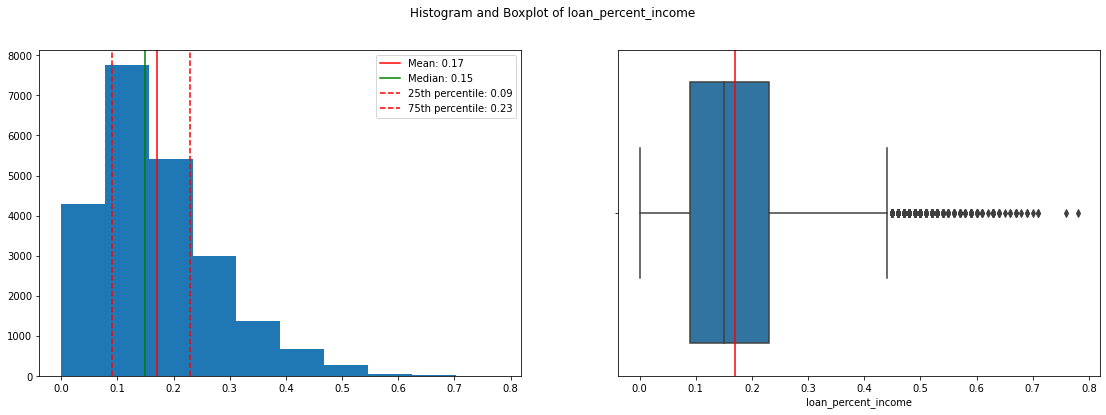

count    22850.000
mean         0.170
std          0.107
min          0.000
25%          0.090
50%          0.150
75%          0.230
max          0.780
Name: loan_percent_income, dtype: float64

Range: 0.78
Interquartile Range: 0.14

Skewness: 1.0532946307596243
Kurtosis: 1.1582211808389333


In [16]:
descriptive_summary_n(numerical[5])

"loan_percent_income" variable is right skewed and lightly tailed. 

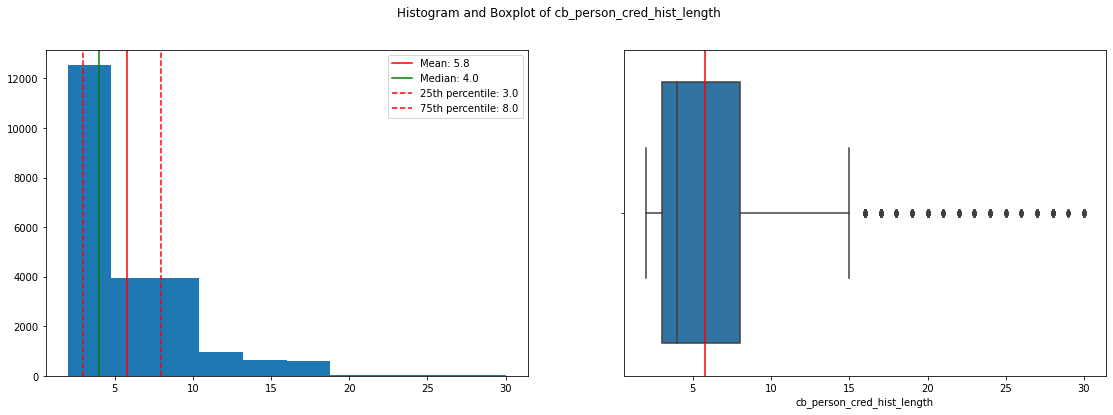

count    22850.000
mean         5.801
std          4.051
min          2.000
25%          3.000
50%          4.000
75%          8.000
max         30.000
Name: cb_person_cred_hist_length, dtype: float64

Range: 28
Interquartile Range: 5.0

Skewness: 1.665791417324648
Kurtosis: 3.730958888389364


In [17]:
descriptive_summary_n(numerical[6])

"cb_person_cred_hist_length" variable is slightly right skewd. Kurtosis equals to 3.7, very close to normal distribution peakedness. Mostly distributed between 3 and 8.

### Descriptive Summaries of Categorical Data

In [18]:
#to make more readable creating copy of data and changing 0 and 1 into Default and Not Default in loan_status variable
data0 = data.copy()
data0.loc[data0['loan_status']==0, 'loan_status']='Not default'
data0.loc[data0['loan_status']==1, 'loan_status']='Default'

In [19]:
def descriptive_summary_c(column):
    print(f"\033[1mFrequency table of {column} variable: \033[0m")
    freq_table = data0[column].value_counts().to_frame().reset_index() #creating frequency table from counts of each category
    freq_table.columns = [column, 'Frequencies']
    freq_table['% Percentages'] = round(freq_table['Frequencies']/data0[column].count()*100,2) #adding percentages
    display(freq_table)
    print()
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(data=freq_table, x='Frequencies', y=column, palette='flare', ax=axs[0]) #barplot to display frequencies
    colors = sns.color_palette('flare')
    d = list(freq_table['% Percentages'])
    labels = list(freq_table[column])
    plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%') #pie chart to show percentage distribution of each category
    fig.suptitle(f"Bar Chart and Pie Chart of {column} variable")
    plt.show()

Frequency table of person_home_ownership variable: 


,person_home_ownership,Frequencies,% Percentages
0,RENT,11506,50.35
1,MORTGAGE,9426,41.25
2,OWN,1841,8.06
3,OTHER,77,0.34


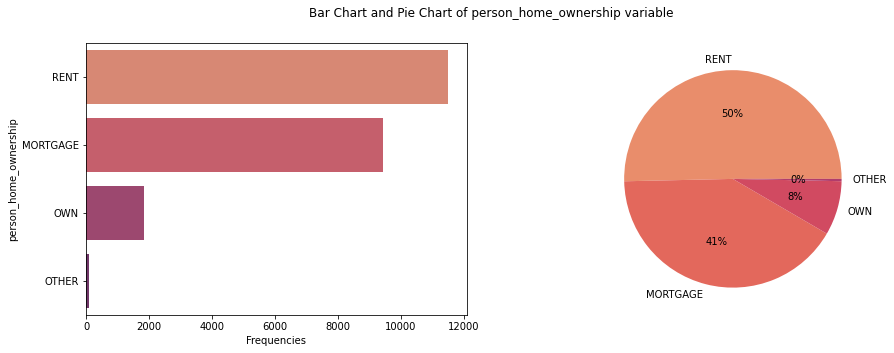

In [20]:
descriptive_summary_c(categorical[0])

The large proportion of the person_home_ownership variable is Rent and Mortage.

Frequency table of loan_intent variable: 


,loan_intent,Frequencies,% Percentages
0,EDUCATION,4547,19.90
1,MEDICAL,4196,18.36
2,VENTURE,3981,17.42
3,PERSONAL,3877,16.97
4,DEBTCONSOLIDATION,3671,16.07
5,HOMEIMPROVEMENT,2578,11.28


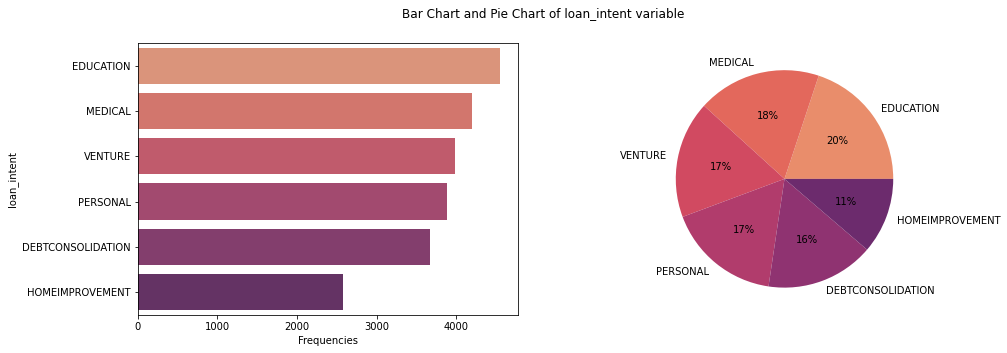

In [21]:
descriptive_summary_c(categorical[1])

Here the data is distributed in approximately the same proportion. But most were taken for educational intent.

Frequency table of loan_grade variable: 


,loan_grade,Frequencies,% Percentages
0,A,7534,32.97
1,B,7358,32.20
2,C,4513,19.75
3,D,2560,11.20
4,E,673,2.95
5,F,172,0.75
6,G,40,0.18


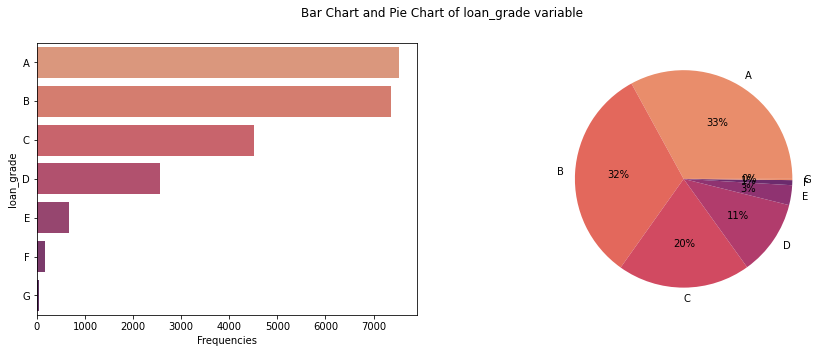

In [22]:
descriptive_summary_c(categorical[2])

Most of the "loan_grade" variable data distributed in of "A", "B", "C", and "D" category. 

Frequency table of loan_status variable: 


,loan_status,Frequencies,% Percentages
0,Not default,17816,77.97
1,Default,5034,22.03


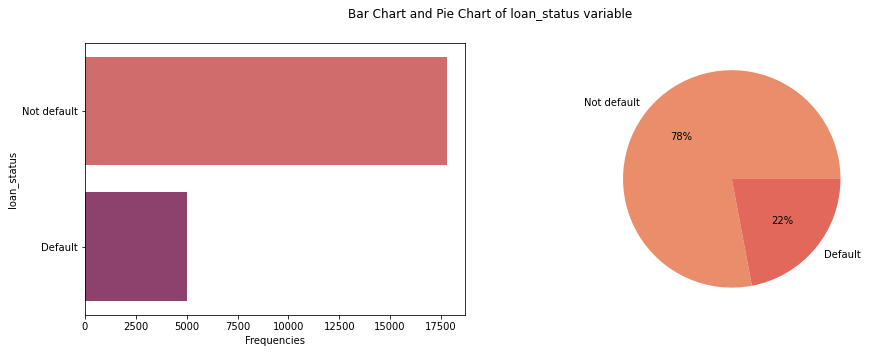

In [23]:
descriptive_summary_c(categorical[3])

Great percentage of loan_status variable is "Not Default" category.

Frequency table of cb_person_default_on_file variable: 


,cb_person_default_on_file,Frequencies,% Percentages
0,N,18804,82.29
1,Y,4046,17.71


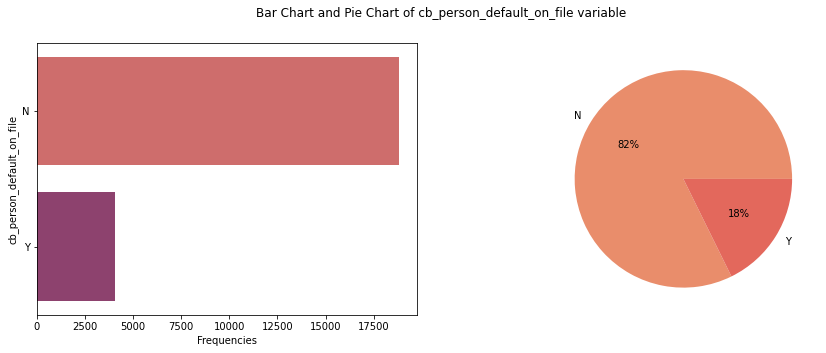

In [24]:
descriptive_summary_c(categorical[4])

"cb_person_default_on_file" is 82% "N" category. 

### Response Variable and Explanatory Variables

The data analysis examines how the outcome on the response variable depends on or is explained by the value of the explanatory variable. In our case, our response variable will be loan_status variable. We will examine how other variables explain and effect loan_status variable.

**_loan_status vs other categorical variables_**

**Contigency Table**

In order to show association between two categorical variable we can use a contigency table. The contingency table is a display for two categorical variables. Its rows list the categories of one variable and its columns list the categories of the other variable. Each entry in the table is the number of observations in the sample at a particular combination of categories of the two categorical variables.

In [25]:
def contigency_table(column):
    crosstable1 = pd.crosstab(data0[column],data0['loan_status']).reset_index()
    crosstable2 = pd.crosstab(data0[column],data0['loan_status']).apply(lambda r: round(r/r.sum()*100,2), axis=1).reset_index()
    crosstable = pd.merge(crosstable1, crosstable2, how='inner', on=column).set_index(column)
    crosstable.columns = ['Default', 'Not_Default', '%Default', '%Not_Default']
    return crosstable

In our contigency table, we also added percentages of each category to the response variable.

**Bar graphs**

The side-by-side bar graph allows us for easy comparison.

In [26]:
def bar_graphs(data):
    N = data.shape[0]
    default_bar = list(data['%Default'])
    nondefault_bar = list(data['%Not_Default'])
    ind = np.arange(N)
    plt.figure(figsize=(10,5))
    width = 0.3       
    plt.bar(ind, default_bar , width, color='royalblue', label='% Default')
    plt.bar(ind + width, nondefault_bar, width, color='seagreen', label='% Not Default')
    plt.xlabel(f"{data.index.name}")
    plt.ylabel('Percentages')
    plt.title(f"Percentage Comparison of {data.index.name} variable")
    plt.xticks(ind + width / 2, list(data.index))
    plt.legend(loc='best')
    plt.show()

,Default,Not_Default,%Default,%Not_Default
person_home_ownership,,,,
MORTGAGE,1216,8210,12.90,87.10
OTHER,22,55,28.57,71.43
OWN,137,1704,7.44,92.56
RENT,3659,7847,31.80,68.20


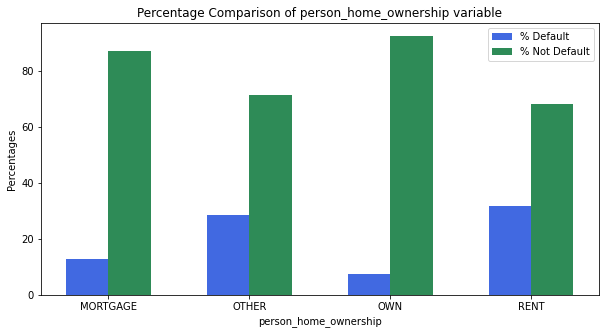

In [27]:
display(contigency_table(categorical[0]))
bar_graphs(contigency_table(categorical[0]))

Loans belonging Mortage and own category rarely defaulted. Rent and Other category belonged loans defaulted more compared to them.

,Default,Not_Default,%Default,%Not_Default
loan_intent,,,,
DEBTCONSOLIDATION,1062,2609,28.93,71.07
EDUCATION,789,3758,17.35,82.65
HOMEIMPROVEMENT,676,1902,26.22,73.78
MEDICAL,1132,3064,26.98,73.02
PERSONAL,774,3103,19.96,80.04
VENTURE,601,3380,15.10,84.90


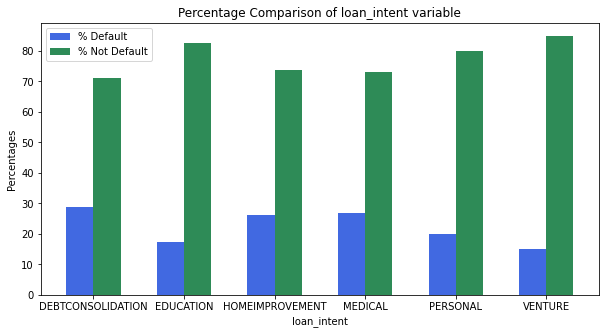

In [28]:
display(contigency_table(categorical[1]))
bar_graphs(contigency_table(categorical[1]))

Loans with debt concolidation reasons defaulted the most. Loans with education and venture purposes defaulted the leaset. Overall there is not much variations of default rate among loan_intent categories.

,Default,Not_Default,%Default,%Not_Default
loan_grade,,,,
A,755,6779,10.02,89.98
B,1219,6139,16.57,83.43
C,942,3571,20.87,79.13
D,1531,1029,59.80,40.20
E,427,246,63.45,36.55
F,120,52,69.77,30.23
G,40,0,100.00,0.00


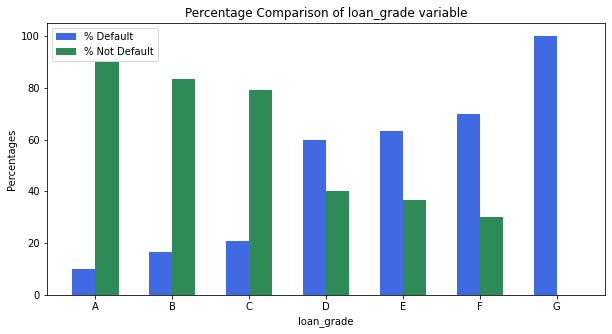

In [29]:
display(contigency_table(categorical[2]))
bar_graphs(contigency_table(categorical[2]))

Loan's default rate from A to G increased respectively.

,Default,Not_Default,%Default,%Not_Default
cb_person_default_on_file,,,,
N,3479,15325,18.50,81.50
Y,1555,2491,38.43,61.57


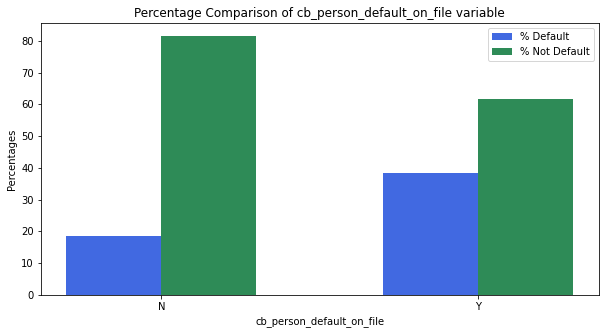

In [30]:
display(contigency_table(categorical[4]))
bar_graphs(contigency_table(categorical[4]))

Borrowers with previous fefault record defualted more than no previous default record.

**_"loan_status" variable vs other quantitive variables_**

To examine how loan_status variable and other quantitive variable associated with each other we can look at how data varies when loan status is Default and when loan status is Not Default.

In [31]:
def des_sum_graph(column):
    fig, axs = plt.subplots(1,2,figsize=(19,6))
    x = data[data['loan_status']==0][column]
    y = data[data['loan_status']==1][column]
    axs[0].hist(x, alpha=0.5, label='Not Default') #creating histogram when loan_status is Default
    axs[0].hist(y, alpha=0.5, label='Default') #creating histogram when loan_status is Not Default
    axs[0].legend(loc='upper right')
    sns.boxplot(data=data0, x='loan_status', y=column, ax=axs[1]) #Boxplot to look quantitive data distribution when loan_status default or not default
    fig.suptitle(f"Histogram and Boxplot of {column} variable according to loan_status variable", fontweight="bold")
    plt.show()
    print(f"\033[1mDescriptive summary of {column} variable when loan_status is Not Default: \033[0m")
    print(f"{data[data['loan_status']==0][column].describe().round(3)}")
    print(f"Range: {data[data['loan_status']==0][column].max() - data[data['loan_status']==0][column].min()}")
    print(f"Interquartile Range: {data[data['loan_status']==0][column].describe()[6] - data[data['loan_status']==0][column].describe()[4]}\n")
    print(f"Skewness: {skew(data[(data['loan_status']==0)&(data[column].isna()==False)][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[(data['loan_status']==0)&(data[column].isna()==False)][column], bias=True)}\n")

    print(f"\033[1mDescriptive summary of {column} variable when loan_status is Default: \033[0m")
    print(f"{data[data['loan_status']==1][column].describe().round(3)}")
    print(f"Range: {data[data['loan_status']==1][column].max() - data[data['loan_status']==1][column].min()}")
    print(f"Interquartile Range: {data[data['loan_status']==1][column].describe()[6] - data[data['loan_status']==1][column].describe()[4]}\n")
    print(f"Skewness: {skew(data[(data['loan_status']==1)&(data[column].isna()==False)][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[(data['loan_status']==1)&(data[column].isna()==False)][column], bias=True)}")

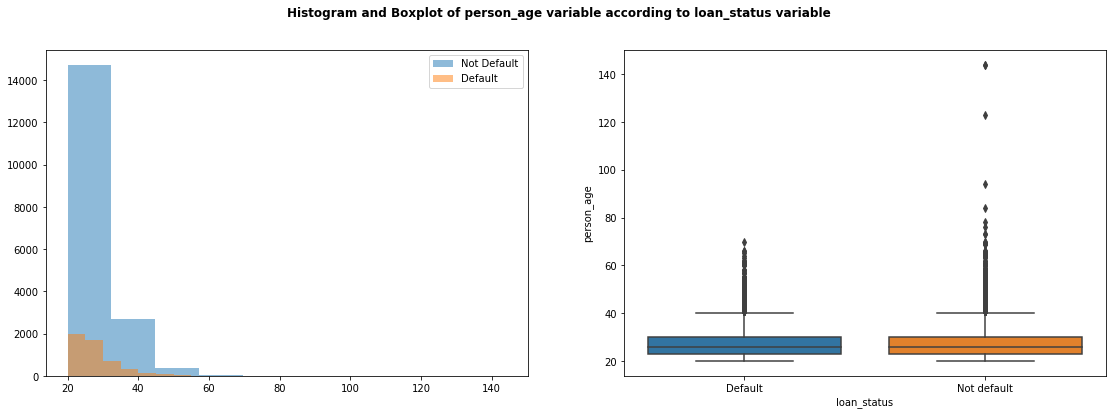

Descriptive summary of person_age variable when loan_status is Not Default: 
count    17816.000
mean        27.782
std          6.347
min         20.000
25%         23.000
50%         26.000
75%         30.000
max        144.000
Name: person_age, dtype: float64
Range: 124
Interquartile Range: 7.0

Skewness: 2.686450990435428
Kurtosis: 20.74609846084759

Descriptive summary of person_age variable when loan_status is Default: 
count    5034.000
mean       27.490
std         6.256
min        20.000
25%        23.000
50%        26.000
75%        30.000
max        70.000
Name: person_age, dtype: float64
Range: 50
Interquartile Range: 7.0

Skewness: 1.965416567342469
Kurtosis: 5.3473448640517525


In [32]:
des_sum_graph(numerical[0])

When loan_staus is Not Default person_age variable is long very tailed, but when it is Default is slightly tailed. But each category's 25th and 75th percentile is 23 and 30 respectively. Mean and median of each category is very close. Overall, person_age variable does not vary with a lot with loan_status categories.

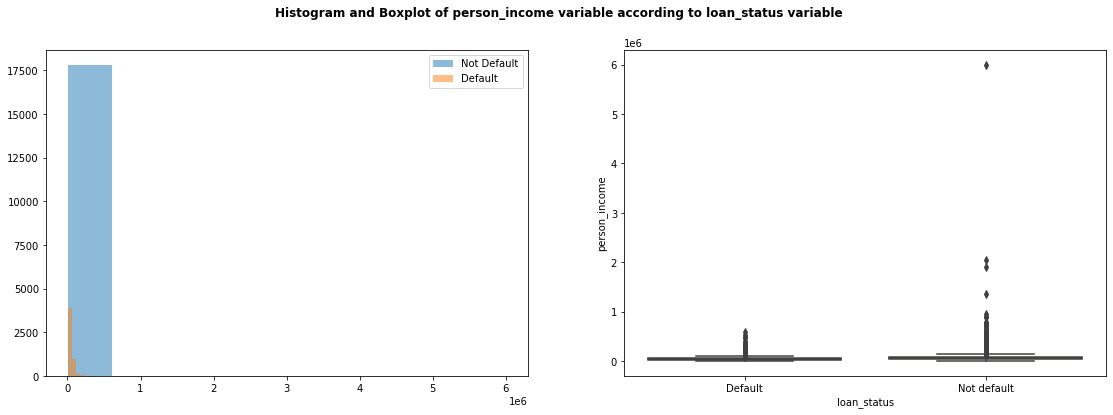

Descriptive summary of person_income variable when loan_status is Not Default: 
count      17816.000
mean       70820.119
std        69528.423
min         7000.000
25%        42000.000
50%        60000.000
75%        84000.000
max      6000000.000
Name: person_income, dtype: float64
Range: 5993000
Interquartile Range: 42000.0

Skewness: 39.251361118484795
Kurtosis: 3049.853266317302

Descriptive summary of person_income variable when loan_status is Default: 
count      5034.000
mean      49139.013
std       35402.174
min        4000.000
25%       30000.000
50%       42000.000
75%       60000.000
max      584800.000
Name: person_income, dtype: float64
Range: 580800
Interquartile Range: 30000.0

Skewness: 4.290316278900995
Kurtosis: 37.785492976721876


In [33]:
des_sum_graph(numerical[1])

person_income variable is very long tailed and heavily right skewed when loan_status is Not Default. Mean of person_income is very different when loan_status Default and when is Not Default. Standard deviation is also greater when loan_status is Not Default. Borrowers with high income default less than those with low income.

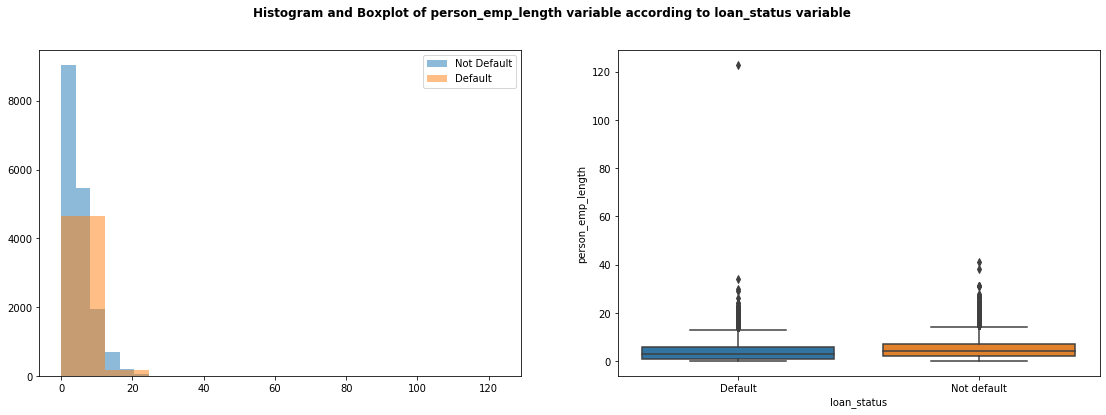

Descriptive summary of person_emp_length variable when loan_status is Not Default: 
count    17394.000
mean         4.973
std          4.060
min          0.000
25%          2.000
50%          4.000
75%          7.000
max         41.000
Name: person_emp_length, dtype: float64
Range: 41.0
Interquartile Range: 5.0

Skewness: 1.2244754918323564
Kurtosis: 2.478872648372911

Descriptive summary of person_emp_length variable when loan_status is Default: 
count    4843.000
mean        4.178
std         4.236
min         0.000
25%         1.000
50%         3.000
75%         6.000
max       123.000
Name: person_emp_length, dtype: float64
Range: 123.0
Interquartile Range: 5.0

Skewness: 5.687571584942788
Kurtosis: 129.42011991678734


In [34]:
des_sum_graph(numerical[2])

person_emp_length variable is mostly distributed between 2 and 7 when loan_status is Not Default and is mostly distributed between 1 and 6 when loan_status is Default. People with less employment lenght default more. However, these numbers close to each other, it does not vary a lot. But data is more skewed and right skewed when loan_status is Default.

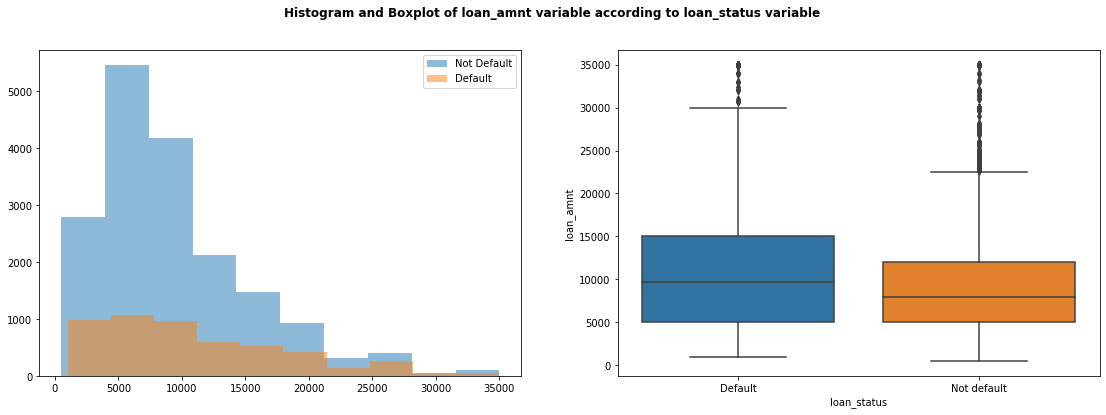

Descriptive summary of loan_amnt variable when loan_status is Not Default: 
count    17816.000
mean      9236.457
std       6007.504
min        500.000
25%       5000.000
50%       8000.000
75%      12000.000
max      35000.000
Name: loan_amnt, dtype: float64
Range: 34500
Interquartile Range: 7000.0

Skewness: 1.2641595117497797
Kurtosis: 1.8190889652575226

Descriptive summary of loan_amnt variable when loan_status is Default: 
count     5034.000
mean     10866.200
std       7207.726
min       1000.000
25%       5000.000
50%       9650.000
75%      15000.000
max      35000.000
Name: loan_amnt, dtype: float64
Range: 34000
Interquartile Range: 10000.0

Skewness: 0.9023327691706979
Kurtosis: 0.3354165794140793


In [35]:
des_sum_graph(numerical[3])

From the distributions, we can see that Default is distributed where loan_amnt is higher. Morever, mean loan_amnt for Default is higher than Not Default. Borrowers with big loan amount default more according to the data.

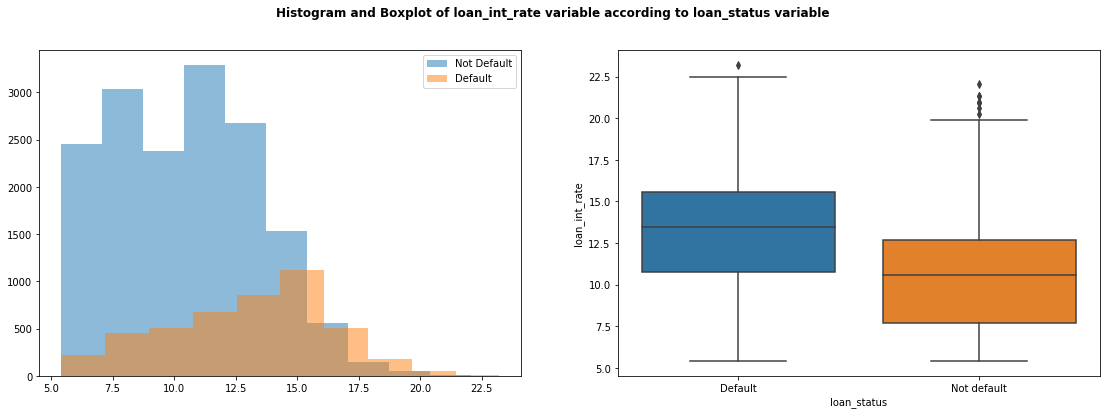

Descriptive summary of loan_int_rate variable when loan_status is Not Default: 
count    16127.000
mean        10.439
std          2.993
min          5.420
25%          7.680
50%         10.590
75%         12.690
max         22.060
Name: loan_int_rate, dtype: float64
Range: 16.64
Interquartile Range: 5.01

Skewness: 0.23299813428085347
Kurtosis: -0.671685753717338

Descriptive summary of loan_int_rate variable when loan_status is Default: 
count    4576.000
mean       13.041
std         3.281
min         5.420
25%        10.740
50%        13.480
75%        15.570
max        23.220
Name: loan_int_rate, dtype: float64
Range: 17.799999999999997
Interquartile Range: 4.83

Skewness: -0.262311387254663
Kurtosis: -0.514615768747225


In [36]:
des_sum_graph(numerical[4])

Interest rates are also higher for defaulted borrowers. It is mostly distributed between 7.68 and 12.69 when when loan_status is Default, and is mostly distributed between 10.74 and 15.58 when when loan_status is Not Default.

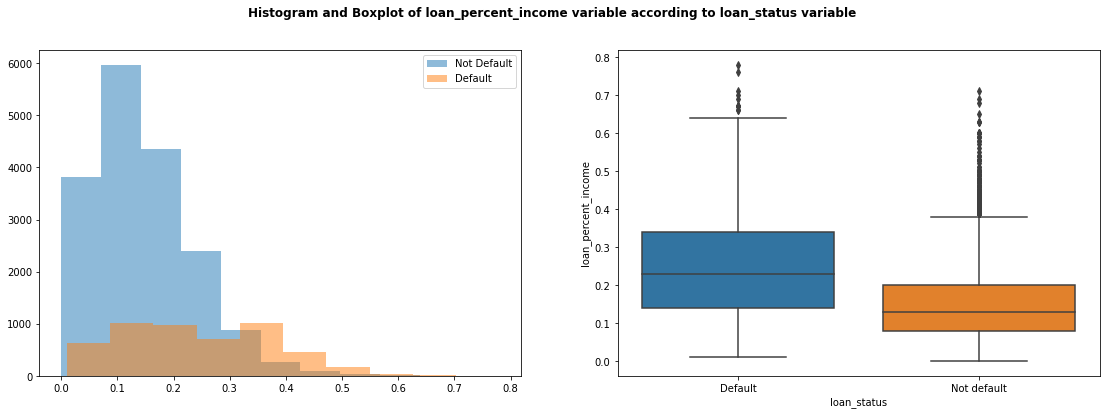

Descriptive summary of loan_percent_income variable when loan_status is Not Default: 
count    17816.000
mean         0.149
std          0.087
min          0.000
25%          0.080
50%          0.130
75%          0.200
max          0.710
Name: loan_percent_income, dtype: float64
Range: 0.71
Interquartile Range: 0.12000000000000001

Skewness: 0.9959411001241197
Kurtosis: 1.5086932615562558

Descriptive summary of loan_percent_income variable when loan_status is Default: 
count    5034.000
mean        0.246
std         0.132
min         0.010
25%         0.140
50%         0.230
75%         0.340
max         0.780
Name: loan_percent_income, dtype: float64
Range: 0.77
Interquartile Range: 0.2

Skewness: 0.35598469250142234
Kurtosis: -0.49066688648260914


In [37]:
des_sum_graph(numerical[5])

loan_percent income is higher for defaulted borrowers. Mean when loan_status is Not Default is 0.149,when loan_status is Default is 0.247.

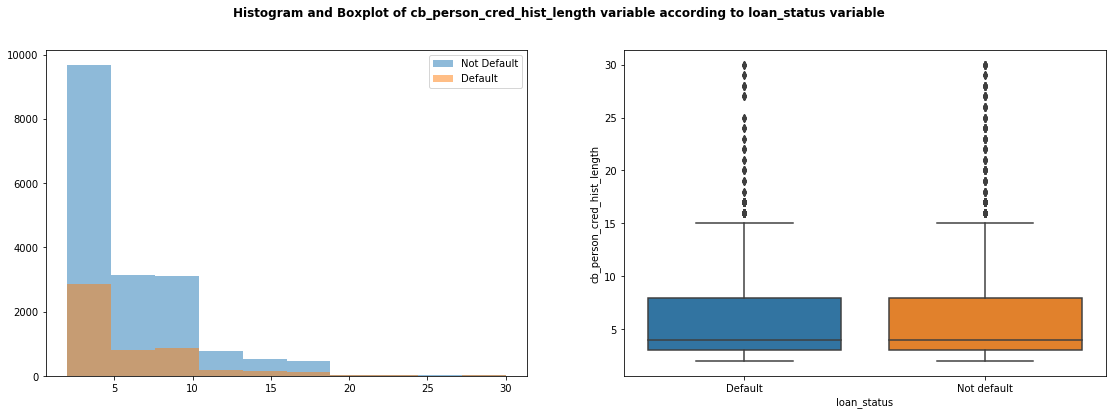

Descriptive summary of cb_person_cred_hist_length variable when loan_status is Not Default: 
count    17816.000
mean         5.830
std          4.039
min          2.000
25%          3.000
50%          4.000
75%          8.000
max         30.000
Name: cb_person_cred_hist_length, dtype: float64
Range: 28
Interquartile Range: 5.0

Skewness: 1.626838260353091
Kurtosis: 3.524035096163183

Descriptive summary of cb_person_cred_hist_length variable when loan_status is Default: 
count    5034.000
mean        5.700
std         4.089
min         2.000
25%         3.000
50%         4.000
75%         8.000
max        30.000
Name: cb_person_cred_hist_length, dtype: float64
Range: 28
Interquartile Range: 5.0

Skewness: 1.8021400697098238
Kurtosis: 4.454044713771811


In [38]:
des_sum_graph(numerical[6])

cb_person_cred_hist_length does not vary a lot with each category. However, mean is higher when loan_status is Default.

### Correlations and Associations Between Variables

**Between Categorical Variables:**

Cramer’s V is a measure of the strength of association between two nominal variables.

It ranges from 0 to 1 where:

* 0 indicates no association between the two variables.
* 1 indicates a strong association between the two variables.

It is calculated as:

Cramer’s _V = √(X2/n) / min(c-1, r-1)_

where:

* X2: The Chi-square statistic
* n: Total sample size
* r: Number of rows
* c: Number of columns

In [39]:
label = preprocessing.LabelEncoder() 
data_encoded = pd.DataFrame() 

for i in data[categorical].columns :
    data_encoded[i]=label.fit_transform(data[i])

In [40]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [41]:
rows= []
for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)      
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
person_home_ownership,1.00,0.01,0.01,0.06,0.00
loan_intent,0.01,1.00,0.00,0.02,0.00
loan_grade,0.01,0.00,1.00,0.17,0.40
loan_status,0.06,0.02,0.17,1.00,0.03
cb_person_default_on_file,0.00,0.00,0.40,0.03,1.00


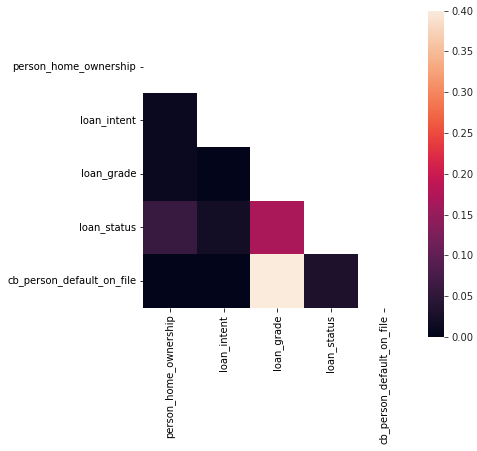

In [42]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask, square=True)
plt.show()

loan_status and person_home_ownership, loan_status and loan_grade, loan_grade and cb_person_default_on_file variables have some observeable correlations between them.

We should examine visual representaion to understand relationship better.

In [43]:
comb = combinations(categorical, 2) #creating every possible combinations between two categorical variables
comb = list(comb)

In [44]:
def crossdict(column1, column2):
    crosstable=pd.crosstab(data0[column1],data0[column2]).apply(lambda r: round(r/r.sum()*100,2), axis=1) #percentage contigency table
    rs = crosstable.shape[0]
    cs = crosstable.shape[1]
    res = {}
    for j in range(rs):
        for i in range(cs):
            res[(crosstable.index[j], crosstable.columns[i])] = crosstable.iloc[j,i] #possible pairs and their percentages
    return res

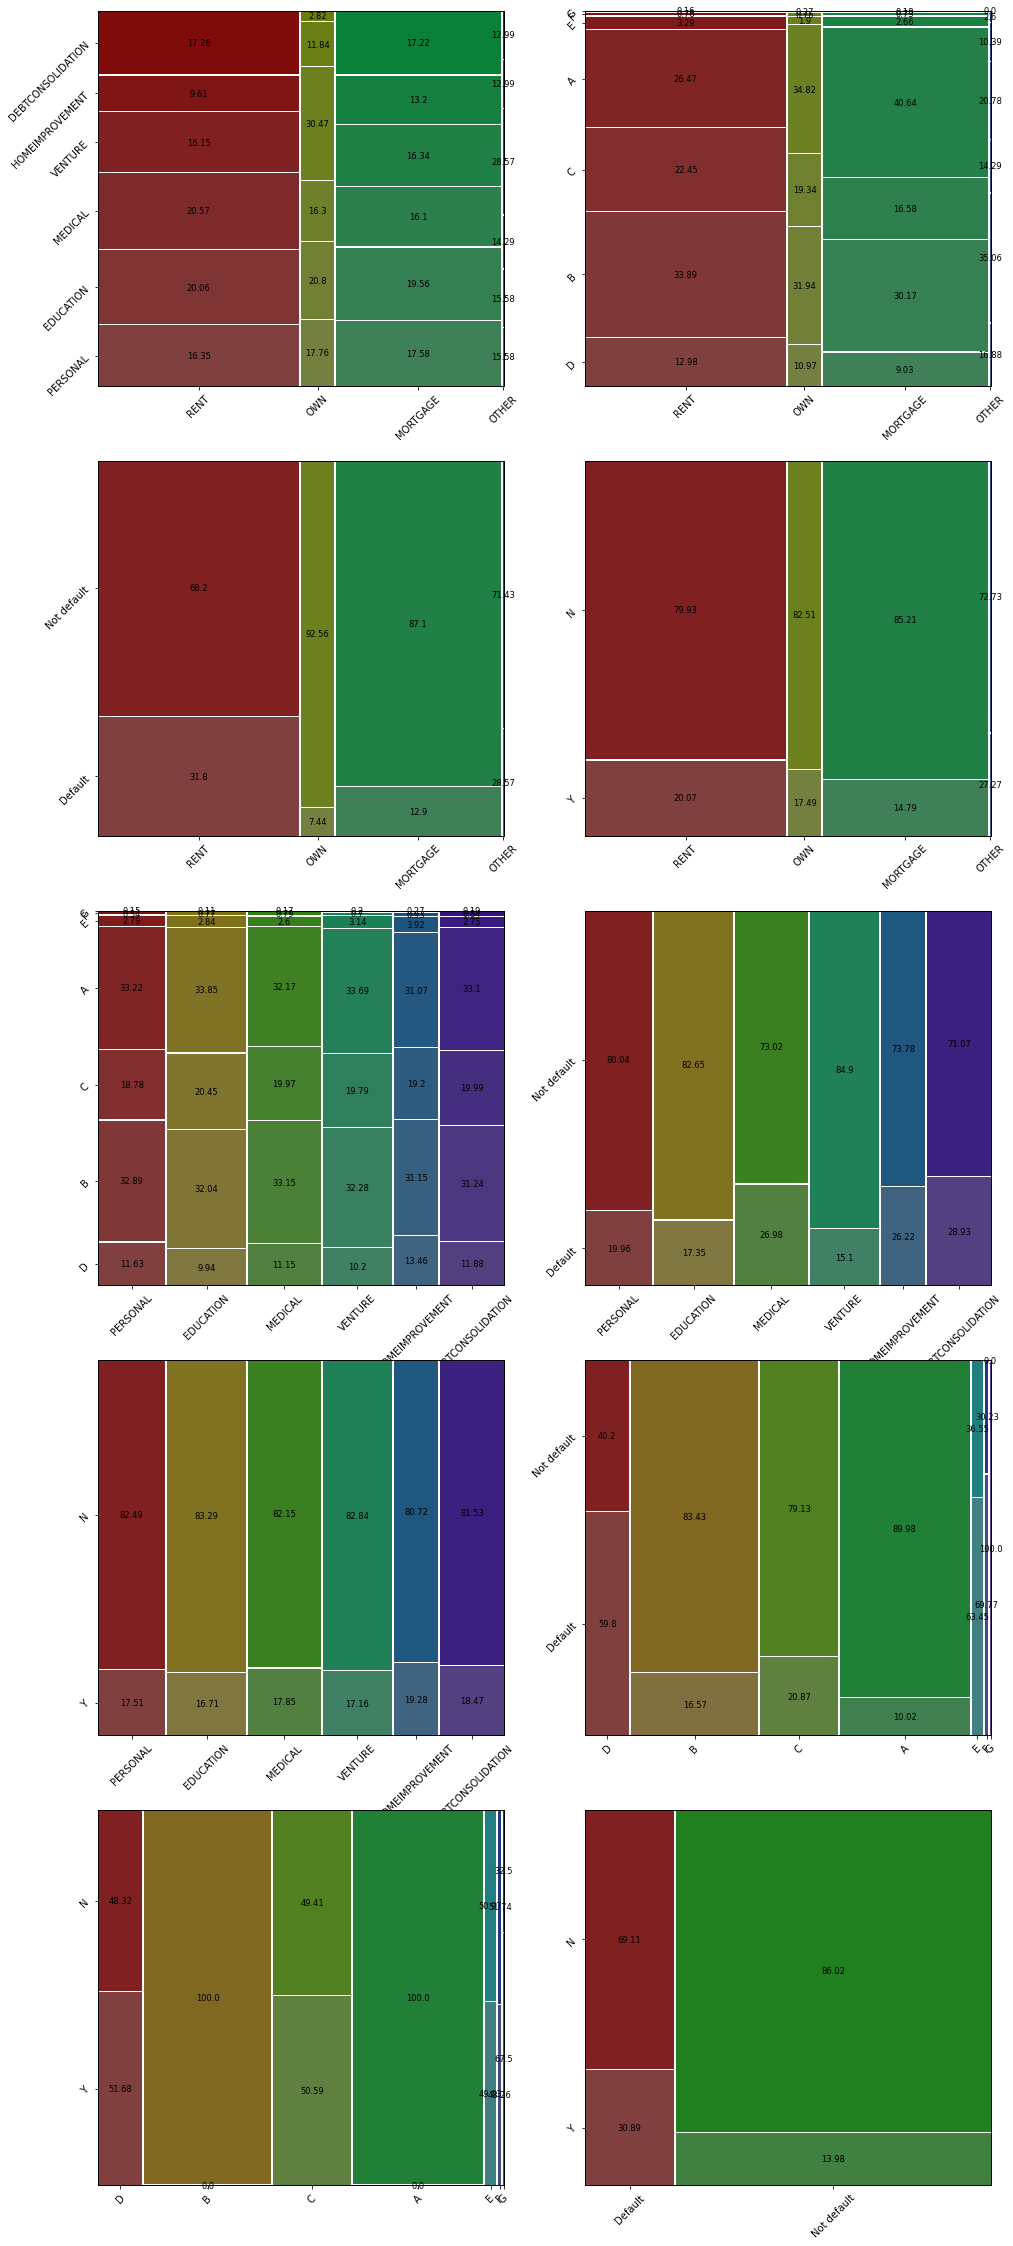

In [45]:
fig,axs = plt.subplots(5,2,figsize=(16,40))
x = 0 #comb list index
for i in range(5):
    for j in range(2):
        labelizer=lambda k:crossdict(comb[x][0],comb[x][1])[k] 
        mosaic(data0,[comb[x][0],comb[x][1]],labelizer=labelizer,label_rotation=45, ax=axs[i,j])
        x += 1
        
plt.show()

We also see from visuals that horizontally, proportions are pretty close to each other except loan_status and person_home_ownership, loan_status and loan_grade, loan_grade and cb_person_default_on_file, also loan_status and cb_person_default_on_file variables.

**Between quantitive variables:**

The Pearson correlation coefficient (also known as the “product-moment correlation coefficient”) is a measure of the linear association between two variables X and Y. It has a value between -1 and 1

where:

* -1 indicates a perfectly negative linear correlation between two variables
* 0 indicates no linear correlation between two variables
* 1 indicates a perfectly positive linear correlation between two variables

In [46]:
data[numerical].corr(method='pearson')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.184800,0.166859,0.047127,0.013473,-0.045282,0.862325
person_income,0.184800,1.000000,0.125688,0.257803,0.003142,-0.244967,0.114556
person_emp_length,0.166859,0.125688,1.000000,0.109852,-0.056084,-0.051559,0.147160
loan_amnt,0.047127,0.257803,0.109852,1.000000,0.149484,0.573556,0.040753
loan_int_rate,0.013473,0.003142,-0.056084,0.149484,1.000000,0.119576,0.019774
loan_percent_income,-0.045282,-0.244967,-0.051559,0.573556,0.119576,1.000000,-0.033787
cb_person_cred_hist_length,0.862325,0.114556,0.147160,0.040753,0.019774,-0.033787,1.000000


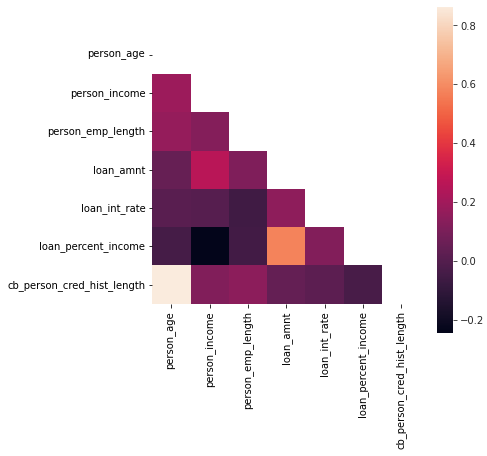

In [47]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(data[numerical].corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data[numerical].corr(method='pearson'), mask=mask, square=True)
plt.show()

person_income is slightly, positively correlated with person_age, also is slightly, positively correlated with person_emp_length. Older people is likely to have more employment length. Whenever we observe a correlation between variables x and y , there may be a third variable correlated with both x and y that is responsible for their association. Correlation between person_income and person_age can be because of third variable person_emp_length. person_age and cb_person_cred_hist_length is positively correlated. Older people are more likely to have longer credit history. loan_percent_income is correlated loan_amnt and person_income, which is quite reasonble since it is ratio of person_income to loan_amnt. person_income is positively correlated with loan_amnt, raeson can be why, higher income borrowers are more likely to pay high loan amount.

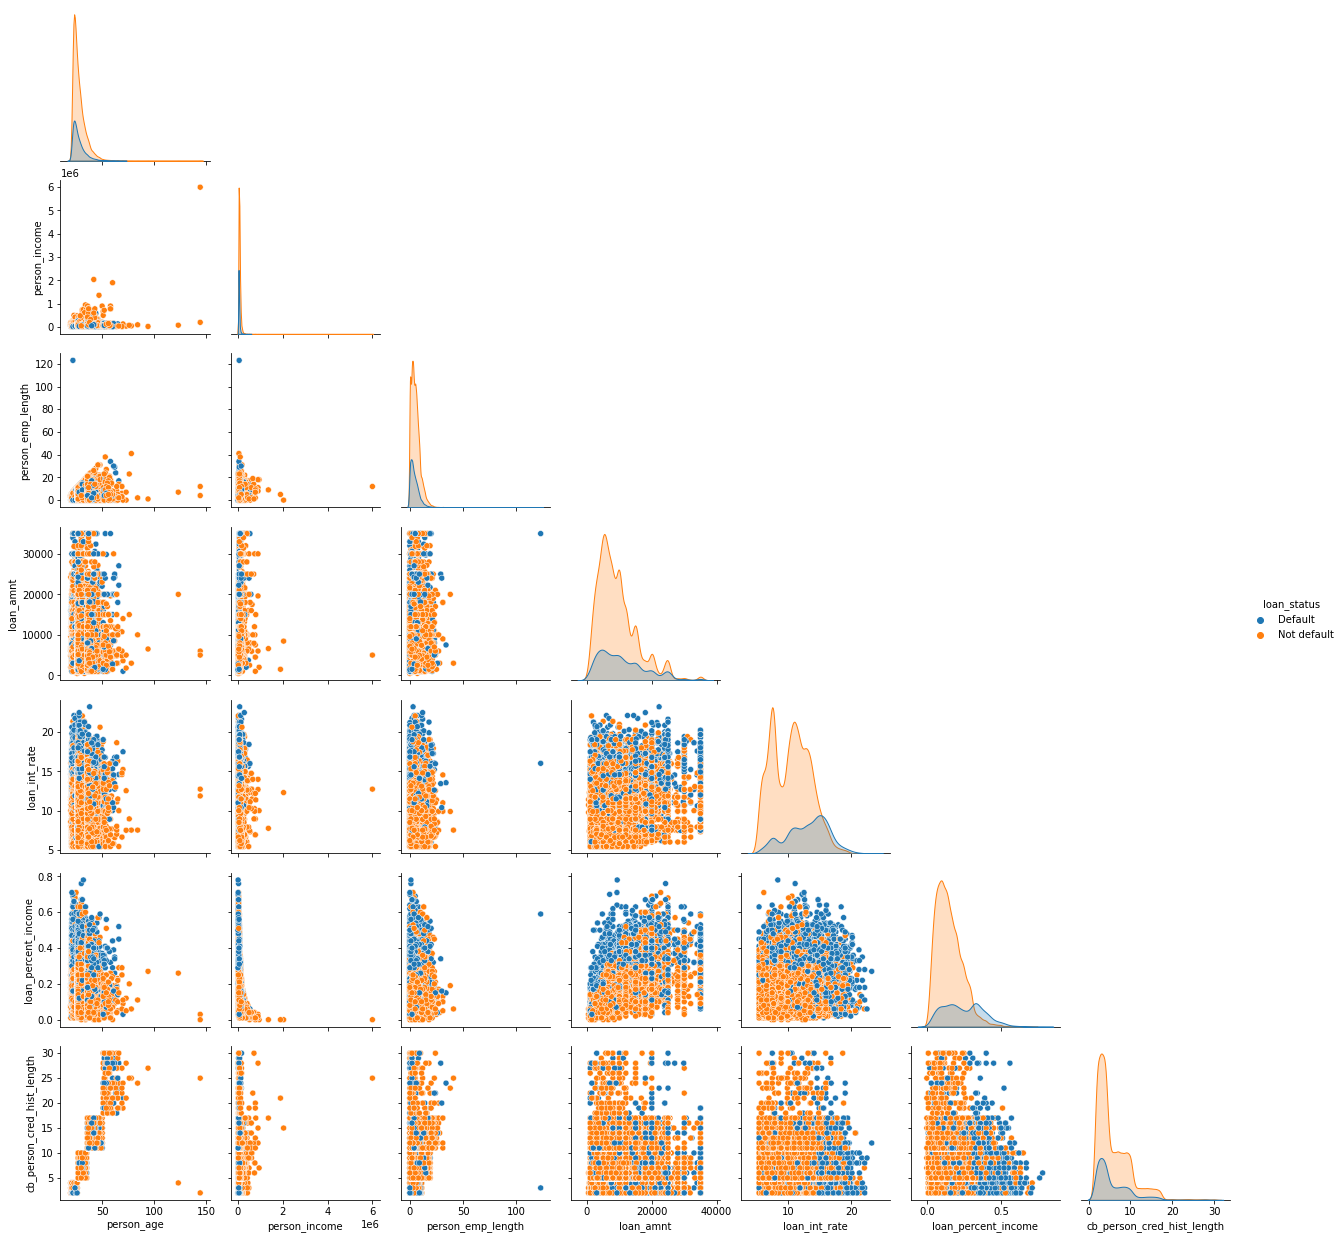

In [48]:
sns.pairplot(data0, hue ='loan_status', corner=True)

we can see the trends we listed above here in visual, too. Morever, we see from scatterplot between loan_int_rate and loan_percent_income an iteresting trend, that higher percent income and higher interest rate is mostly defaulted observations

**Pearson correlation between categorical and numerical variables**

In [49]:
label = preprocessing.LabelEncoder() 
data_encoded = pd.DataFrame() 

for i in data[categorical].columns :
    data_encoded[i]=label.fit_transform(data[i]) #converting categorical data into integer format with LabelEncoder()

In [50]:
rows = {}
for var1 in data[numerical].columns:
    values = [] 
    for var2 in data_encoded.columns:
        corr= data[var1].corr(data_encoded[var2])
        values.append(corr)
    rows[var1] = values

In [51]:
df = pd.DataFrame(rows, index=data_encoded.columns)
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_home_ownership,-0.037581,-0.200715,-0.226042,-0.130252,0.140257,0.147803,-0.027587
loan_intent,0.028795,0.000679,0.014245,-0.001896,0.001593,0.006557,0.030236
loan_grade,0.014932,0.001124,-0.050353,0.145340,0.933242,0.121299,0.016494
loan_status,-0.019098,-0.139895,-0.079762,0.106749,0.332748,0.377689,-0.013249
cb_person_default_on_file,0.005141,-0.001627,-0.033107,0.038494,0.505089,0.035525,0.005421


<AxesSubplot:>

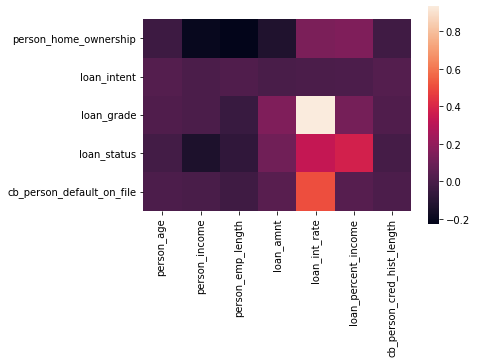

In [52]:
sns.heatmap(df, square=True)

person_home_ownership and person_income, person_home_ownership and person_emp_length, loan_grade and loan_int_rate, loan_status and loan_int_rate, loan_status and loan_percent_income, cb_person_default_on_file and loan_int_rate variables has some correlations between them.

We will examine this relationships through violinplots

In [53]:
pairs = []
for i in numerical:
    for j in categorical:
        pairs.append((i,j)) #creating possible pairs of categorical and numerical variables

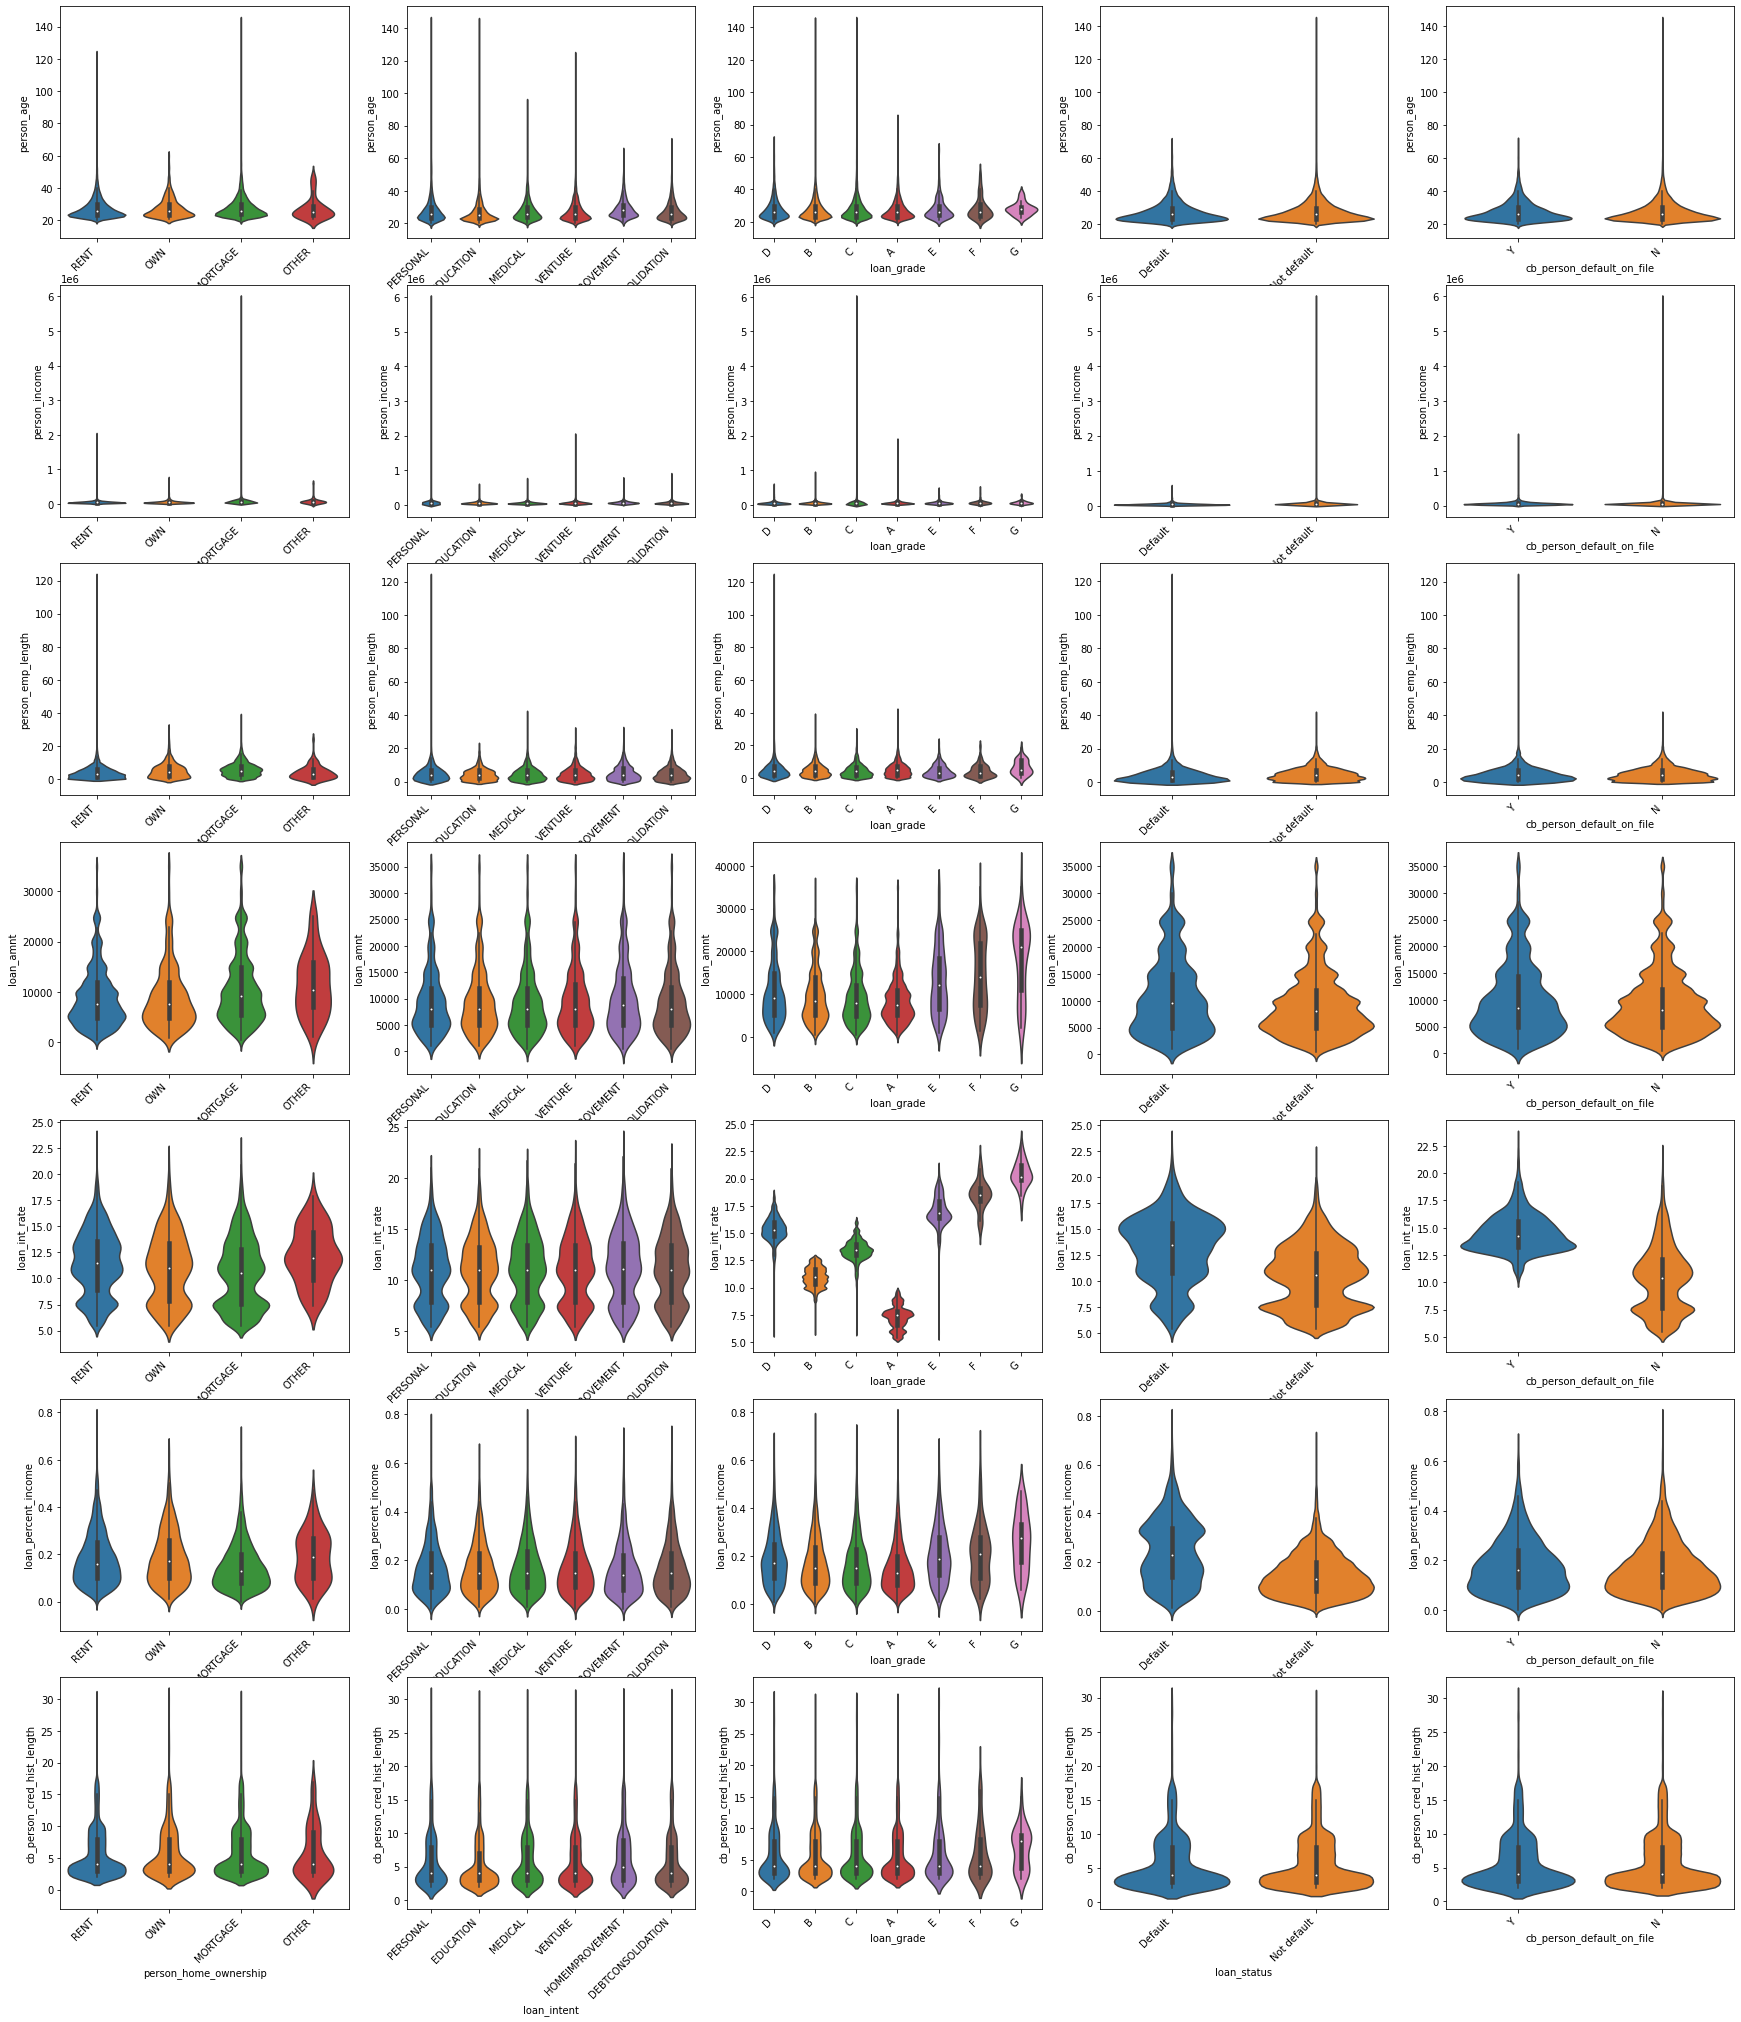

In [54]:
fig, axs = plt.subplots(7,5, figsize=(30,35))
x = 0 #pairs list index
for i in range(7):
    for j in range(5):
        sns.violinplot(data=data0, x=pairs[x][1], y=pairs[x][0], ax=axs[i,j])
        axs[i,j].set_xticklabels(axs[i,j].get_xticklabels(), rotation=45, ha='right')
        x += 1

Borrowers with mortage person_home_ownership category have higher income than other categories. Borrowers with mortage and rent home ownership type have more more employment length, since they have to pay rent and their mortages. Between loan_grade and loan_int_rate there is a trend, as grade goes from A to G, interest rates rises. The realtionship between cb_person_default_on_file and loan_int_rate shows that borrowers who defaulted on their loans tend to have higher interest rates on their loans.

Summary:
* Exploration of each variable, how it distributed across the data.
* Response Variable and its relationships with other categorical and quantitive variables.
* Association and Correlations of the variables.

